In [1]:
import pandas as pd
import os
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


# Loads labels
df = pd.read_csv('../data/seedling_labels_with_features.csv')

#df = df.drop(columns=['Pos','average_expert'])
#df = df.iloc[:, -8:]
decisions = df.loc[:,['Expert 1','Expert 2','Expert 3', 'Expert 4']]
df

,Expert 1,Expert 2,Expert 3,Expert 4,color_cam_path,side_cam_path,Rfid,Pos,average_expert,plant_width_side_view,plant_height_side_view,plant_area_side_view,plant_width_top_view,plant_height_top_view,plant_area_top_view,binary_expert
0,4,4,4,4,data/A1/00387 Plant 0000 Plant 0000/18-02-2019...,data/A1/00387 Plant 0000 Plant 0000/18-02-2019...,A1,Plant 0000,4.00,120,239,8577,263,277,18368,0
1,1,1,1,1,data/A1/00388 Plant 0001 Plant 0001/18-02-2019...,data/A1/00388 Plant 0001 Plant 0001/18-02-2019...,A1,Plant 0001,1.00,591,407,29037,585,548,85112,1
2,1,1,1,1,data/A1/00389 Plant 0002 Plant 0002/18-02-2019...,data/A1/00389 Plant 0002 Plant 0002/18-02-2019...,A1,Plant 0002,1.00,388,449,31946,450,692,86757,1
3,4,4,3,3,data/A1/00390 Plant 0003 Plant 0003/18-02-2019...,data/A1/00390 Plant 0003 Plant 0003/18-02-2019...,A1,Plant 0003,3.50,92,242,8694,281,276,23174,0
4,3,1,1,1,data/A1/00391 Plant 0004 Plant 0004/18-02-2019...,data/A1/00391 Plant 0004 Plant 0004/18-02-2019...,A1,Plant 0004,1.50,582,494,42052,670,534,102178,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,1,1,1,1,data/B4/01019 Plant 0122 Plant 0122/18-02-2019...,data/B4/01019 Plant 0122 Plant 0122/18-02-2019...,B4,Plant 0122,1.00,489,576,67521,543,412,28583,1
967,1,1,1,1,data/B4/01020 Plant 0123 Plant 0123/18-02-2019...,data/B4/01020 Plant 0123 Plant 0123/18-02-2019...,B4,Plant 0123,1.00,453,640,52135,631,629,34084,1
968,1,1,1,1,data/B4/01021 Plant 0124 Plant 0124/18-02-2019...,data/B4/01021 Plant 0124 Plant 0124/18-02-2019...,B4,Plant 0124,1.00,373,515,49684,529,642,64648,1
969,2,3,3,3,data/B4/01022 Plant 0125 Plant 0125/18-02-2019...,data/B4/01022 Plant 0125 Plant 0125/18-02-2019...,B4,Plant 0125,2.75,199,391,19799,473,474,28961,0


In [2]:
# Define a function to convert the values to binary
def convert_to_binary(x):
    if x in [1, 2]:
        return 1
    else:
        return 0

# Apply the function to each element in the dataframe
decisions = decisions.applymap(convert_to_binary)
features = df.iloc[:,10:16]
voting = pd.concat([features,decisions],axis = 1)
voting.head()

,plant_height_side_view,plant_area_side_view,plant_width_top_view,plant_height_top_view,plant_area_top_view,binary_expert,Expert 1,Expert 2,Expert 3,Expert 4
0,239,8577,263,277,18368,0,0,0,0,0
1,407,29037,585,548,85112,1,1,1,1,1
2,449,31946,450,692,86757,1,1,1,1,1
3,242,8694,281,276,23174,0,0,0,0,0
4,494,42052,670,534,102178,1,0,1,1,1


In [3]:
##MAJORITY VOTING

# define ground truth as the expert majority vote with 75%+ agreement
true_labels = df["binary_expert"]


In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
import pickle

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from scipy.stats import mode
from scipy.stats import bayes_mvs

X = voting.iloc[:, 0:5]
y = true_labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=58)


In [5]:
# Train different classifiers
clf1 = RandomForestClassifier(random_state=57)
clf2 = AdaBoostClassifier(random_state=57)
clf3 = LogisticRegression(random_state=57)
clf4 = GaussianNB()

clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)
clf4.fit(X_train, y_train)


with open('clf1.pkl', 'wb') as file:
    pickle.dump(clf1,file)

with open('clf2.pkl', 'wb') as file:   
    pickle.dump(clf2,file)

with open('clf3.pkl', 'wb') as file:
        pickle.dump(clf3,file)
    
with open('clf4.pkl', 'wb') as file:
        pickle.dump(clf4,file)



In [6]:
y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)
y_pred3 = clf3.predict(X_test)
y_pred4 = clf4.predict(X_test)

y_preds = np.vstack((y_pred1, y_pred2, y_pred3, y_pred4))
y_preds_to_save = np.transpose(y_preds)
y_test_to_save = np.array(y_test)
np.savetxt("models_predictions.csv", y_preds_to_save, delimiter=",")
np.savetxt("true_answer.csv", y_test_to_save, delimiter=",")


In [7]:
from sklearn.metrics import confusion_matrix
conf1 = confusion_matrix(y_test, y_pred1, normalize = 'true')
conf2 = confusion_matrix(y_test, y_pred2, normalize = 'true')
conf3 = confusion_matrix(y_test, y_pred3, normalize = 'true')
conf4 = confusion_matrix(y_test, y_pred4, normalize = 'true')

print(conf1)
print(conf2)
print(conf3)
print(conf4)

[[0.95294118 0.04705882]
 [0.03381643 0.96618357]]
[[0.95294118 0.04705882]
 [0.03864734 0.96135266]]
[[0.85882353 0.14117647]
 [0.0531401  0.9468599 ]]
[[0.92941176 0.07058824]
 [0.07729469 0.92270531]]


In [8]:
# Bayesian Fusion
# Compute prior porbabilities by proportion of samples
sample_counts = true_labels.value_counts()
total_samples = sample_counts[0]+sample_counts[1]
prior_prob = [sample_counts[0]/total_samples , sample_counts[1]/total_samples]
print(prior_prob)

def Bayesian_consensus(ord_conf_matr, predictions):
    # initialize output lists
    bayes_cons_u = []
    bayes_cons_h = []
    bayes_pred = []
    
    # Iterate over each sample
    for p in range(len(predictions[0])):
        prior = prior_prob
        
        # compute conditional probabilities
        for x in range(len(ord_conf_matr)):
            p_u = (prior[0]*ord_conf_matr[x][0][predictions[x][p]]) / (prior[1]*ord_conf_matr[x][1][predictions[x][p]] + prior[0]*ord_conf_matr[x][0][predictions[x][p]])
            # update prior probabilities for next round
            prior = [p_u, (1 - p_u)]
        
        # catalogue results
        bayes_cons_h.append(prior[1])
        bayes_cons_u.append(prior[0])
        if prior[1] > prior[0]:
            bayes_pred.append(1)
        else:
            bayes_pred.append(0)
        
    return bayes_pred


[0.2883625128733265, 0.7116374871266735]


In [9]:
def decision_fusion(y_preds, method='hard'):
    if method == 'hard':
        return mode(y_preds, axis=0)[0][0]
    elif method == 'soft':
        return np.round(np.mean(y_preds, axis=0))
    elif method == 'bayesian':
        return Bayesian_consensus([conf1, conf2, conf3, conf4] , y_preds)
    else:
        raise ValueError("Invalid method")


In [10]:
y_pred_hard = decision_fusion(y_preds, method='hard')
y_pred_soft = decision_fusion(y_preds, method='soft')
y_pred_bayesian = decision_fusion(y_preds, method='bayesian')


In [11]:
print("Model 1: Random Forest Accuracy", accuracy_score(y_test, y_pred1))
print("Model 2: Ada Boost Accuracy", accuracy_score(y_test, y_pred2))
print("Model 3: Logistice Regression Accuracy", accuracy_score(y_test, y_pred3))
print("Model 4: Guassian NB Accuracy", accuracy_score(y_test, y_pred4))
print("Hard Voting Accuracy:", accuracy_score(y_test, y_pred_hard))
print("Soft Voting Accuracy:", accuracy_score(y_test, y_pred_soft))
print("Bayesian Consensus Accuracy:", accuracy_score(y_test, y_pred_bayesian))

Model 1: Random Forest Accuracy 0.9623287671232876
Model 2: Ada Boost Accuracy 0.958904109589041
Model 3: Logistice Regression Accuracy 0.9212328767123288
Model 4: Guassian NB Accuracy 0.9246575342465754
Hard Voting Accuracy: 0.952054794520548
Soft Voting Accuracy: 0.952054794520548
Bayesian Consensus Accuracy: 0.9691780821917808


In [68]:
avg_conf = (conf1 + conf2 + conf3 + conf4)/4
df_res = pd.DataFrame({"accuracy": [], "sensitivity": [], "specificity": [],"f1-score": []})
labels = ["Random Forest", "Adaptive Boosting", "Logistic Regression", "Gauss Naive Bayes", "Average Model", "Majority Vote", "Bayesian Consensus"]
conf_matrices = [conf1, conf2, conf3, conf4, avg_conf, confusion_matrix(y_test,y_pred_hard), 
                 confusion_matrix(y_test,y_pred_bayesian)]
for x in conf_matrices:
    acc = (x[0][0] + x[1][1]) / (x[0][0] + x[1][0] + x[0][1] + x[1][1])
    sens = x[0][0] / (x[0][0] + x[0][1])
    spec = x[1][1] / (x[1][0] + x[1][1])
    f_score = (2*x[0][0]) / (2*x[0][0] + x[1][0] + x[0][1])
    df_res = df_res.append(pd.Series([acc, sens, spec, f_score], index = df_res.columns, name = labels.pop(0)))
df_res


,accuracy,sensitivity,specificity,f1-score
Random Forest,0.959562,0.952941,0.966184,0.959293
Adaptive Boosting,0.957147,0.952941,0.961353,0.956966
Logistic Regression,0.902842,0.858824,0.946860,0.898368
Gauss Naive Bayes,0.926059,0.929412,0.922705,0.926306
Average Model,0.936402,0.923529,0.949275,0.935573
Majority Vote,0.952055,0.952941,0.951691,0.920455
Bayesian Consensus,0.969178,0.952941,0.975845,0.947368


In [18]:
df_res.to_csv("Voting_evaluation.csv")

<AxesSubplot:title={'center':'specificity'}>

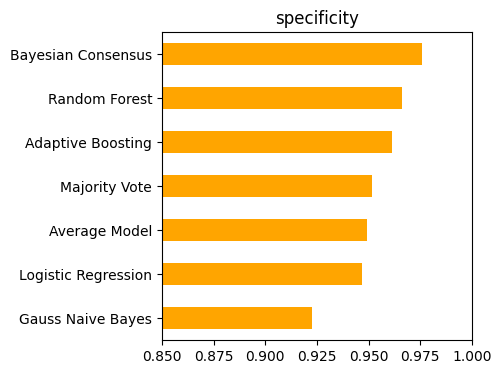

In [73]:
#!pip install matplotlib
from matplotlib import pyplot as plt
df_res = df_res.sort_values(by=['specificity'])


df_res['specificity'].plot.barh(title = 'specificity', figsize = (4,4), xlim = (0.85, 1), color = "orange")